<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#«Статистическая-проверка-гипотез-для-связанных-выборок.-A/B-тесты-и-как-их-проводить»" data-toc-modified-id="«Статистическая-проверка-гипотез-для-связанных-выборок.-A/B-тесты-и-как-их-проводить»-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></a></span></li><li><span><a href="#Начнем-с-датасета-про-морских-гребешков" data-toc-modified-id="Начнем-с-датасета-про-морских-гребешков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Начнем с датасета про морских гребешков</a></span><ul class="toc-item"><li><span><a href="#1.-Вам-даны-результаты-проверки-двух-препаратов.-Требуется-оценить,-есть-ли-различие-в-эффекте-у-этих-пациентов." data-toc-modified-id="1.-Вам-даны-результаты-проверки-двух-препаратов.-Требуется-оценить,-есть-ли-различие-в-эффекте-у-этих-пациентов.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.</a></span></li><li><span><a href="#3.-Допустим-вы-решили-устроить-дачный-эксперимент.-Берем-и-поливаем-одни-огурцы-водой,-другие-огурцы-водой-с-удобнением,-третью-группу-огурцов-будем-поливать-минералкой.-Используя-дисперсионный-ананлиз,-сделайте-выводы-о-распредлениях-результатов.-Если-ли-эффект-от-удобрения-по-сравнению-с-минералкой?" data-toc-modified-id="3.-Допустим-вы-решили-устроить-дачный-эксперимент.-Берем-и-поливаем-одни-огурцы-водой,-другие-огурцы-водой-с-удобнением,-третью-группу-огурцов-будем-поливать-минералкой.-Используя-дисперсионный-ананлиз,-сделайте-выводы-о-распредлениях-результатов.-Если-ли-эффект-от-удобрения-по-сравнению-с-минералкой?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой?</a></span></li></ul></li><li><span><a href="#Данные-получены-от-90-189-игроков,-которые-установили-игру-во-время-проведения-AB-теста.-Переменные:" data-toc-modified-id="Данные-получены-от-90-189-игроков,-которые-установили-игру-во-время-проведения-AB-теста.-Переменные:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:</a></span><ul class="toc-item"><li><span><a href="#Используя-любой-тест-для-проверки-статистической-гипотезы,-продемонстрируйте-наличие-эффекта-из-за-сдвига-ворот." data-toc-modified-id="Используя-любой-тест-для-проверки-статистической-гипотезы,-продемонстрируйте-наличие-эффекта-из-за-сдвига-ворот.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.</a></span></li></ul></li></ul></div>

In [3]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt  #Пакет для построяния графиков и прочего

<p style="align: center;"><img align=center src="https://netology.ru/blog/wp-content/uploads/2020/03/logo-full-color-black-1.png"  width=400></p>
<h3 style="text-align: center;"><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>


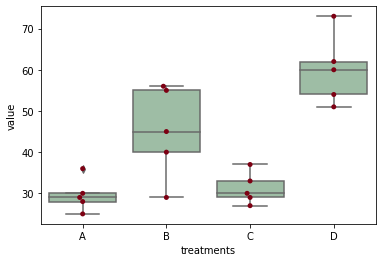

In [2]:
import pandas as pd  # Подгрузим пакет 

df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t") # Подгрузим данные

# изменить форму кадра данных d, подходящего для пакета statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])


# заменить имена столбцов
df_melt.columns = ['index', 'treatments', 'value']

# создать коробчатую диаграмму, чтобы увидеть распределение данных по обработкам. Используя коробчатую диаграмму, мы можем
# легко обнаружить различия между разными методами лечения
 
import seaborn as sns  # Еще одна библиотека для визуализации данных, но более продвинутая
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [3]:
import scipy.stats as stats
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


### Начнем с датасета про морских гребешков

In [4]:
data = pd.read_csv('abalone.csv')
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [5]:
half = len(data['Length']) / 2 
sam2 = data.loc[:half, 'Length'] # Берем вторую половину 
sam1 = data.loc[half:, 'Length'] # Берем первую половину 

stats.ttest_ind(sam2, sam1) # применяем тест Стьюдента. 

Ttest_indResult(statistic=-1.5565212835974083, pvalue=0.11965998094160571)

# Дисперсионный анализ и датасет про раковины

In [6]:
#Дисперсионный анализ.

from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

# Вот некоторые данные [3] об измерении раковины (длина рубца передней приводящей мышцы, 
# стандартизированная путем деления на длину) у мидии Mytilus trossulus из пяти мест: 
# Тилламук, Орегон; Ньюпорт, Орегон; Петербург, Аляска; Магадан, Россия; 
# и Tvarminne, Финляндия, взяты из гораздо большего набора данных, использованных McDonald et al. (1991).


# Берем несколько выборок с размерами раковин разных видов
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

7.121019471642447 0.0002812242314534544
Different distribution (reject H0)


# Можете привести пример когда выборки зависимы, а когда нет ?

In [7]:
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни

from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
 
# Генерирумм две независимых выборки
 
group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент
group_1 = group
group_2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]
 


# Сравнение групп

stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=50.000, p=0.106
Одинаковые распределения (не отвергаем H0)


In [8]:
np.mean(group_1), np.mean(group_2)

(21.0, 22.75)

In [9]:
# pd.DataFrame(group_1).hist()
# pd.DataFrame(group_2).hist()

# Какие выборки зависимы? Приведите примеров

In [10]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
seed(1)



group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент

group_1 = group + group 

group_2 = group + [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

group_3 = group + [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 18] # отличие только в одном элементе

import scipy.stats as stats

#Выполняем the Wilcoxon-Signed Rank Test
 

stat, p = wilcoxon(group_1, group_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=0.000, p=0.317
Одинаковые распределения (не отвергаем H0)


C:\Users\Professional\AppData\Roaming\Python\Python38\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Professional\AppData\Roaming\Python\Python38\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [11]:
  
# pd.DataFrame(group_1).hist()
# pd.DataFrame(group_2).hist()    

# Задания для самостоятельного решения

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [12]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)
alpha = 0.05
fvalue, pvalue = stats.f_oneway(A, B)
if pvalue <= alpha: 
    print(f'Pv ={pvalue}, Pv < {alpha} мы отклоняем консервативную гипотезу что между группами нет различий')
else:
    print(f'Pv ={pvalue}, Pv > {alpha} мы принимаем консервативную гипотезу что между группами нет различий')

Pv =0.08451003973499746, Pv > 0.05 мы принимаем консервативную гипотезу что между группами нет различий


#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 


water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [26]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

для начала узнаем одининаковые ли вообще дисперсии

In [27]:
headers_list =  [water, nutri, mineral] 
var_list = [np.var(header) for header in headers_list]
var_list

[1.5274999999999999, 2.2222222222222223, 1.5827664399092969]

нормально ли распределение

In [28]:
from scipy import stats as st
from scipy.stats import shapiro
normal_list = []
for header in headers_list:
    shapiro_test = st.shapiro(header)
    p = shapiro_test.pvalue
    normal_list.append(p)
normal_list

[0.07698187232017517, 0.174357071518898, 0.06890825927257538]

вообще при уровне значимости 0.05 нельзя сказать что распределение нормальное

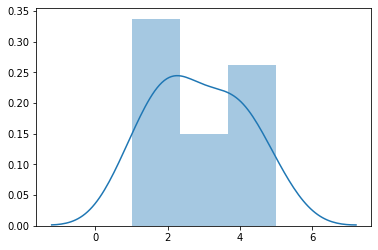

In [16]:
import seaborn as sns
sns_plot = sns.distplot(water)
fig = sns_plot.get_figure()

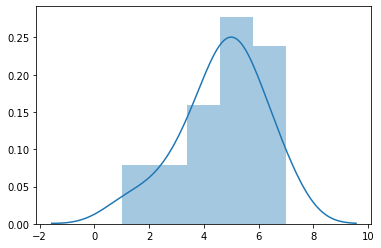

In [17]:
sns_plot = sns.distplot(nutri)
fig = sns_plot.get_figure()

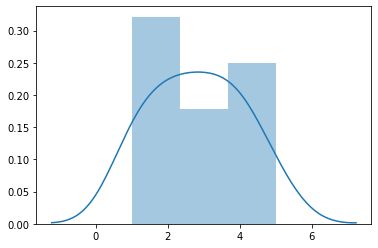

In [18]:
sns_plot = sns.distplot(mineral)
fig = sns_plot.get_figure()

In [19]:
from scipy.stats import f_oneway
f_onewayResult = f_oneway(water, nutri, mineral)
f_onewayResult

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

Хмм, тест ANOVA говорит что pv = 2.9240047906326866e-05 и результаты равнозначны

# Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=400></p>
 

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

# Данные A/B тестирования

In [4]:
data = pd.read_csv('cookie_cats.csv') 
data.tail(20)

,userid,version,sum_gamerounds,retention_1,retention_7
90169,9997628,gate_40,3,False,False
90170,9997747,gate_30,14,False,False
90171,9997757,gate_30,84,True,False
90172,9997864,gate_30,14,False,False
90173,9997873,gate_40,6,False,False
90174,9997928,gate_30,2,False,False
90175,9998125,gate_30,30,False,False
90176,9998285,gate_30,0,False,False
90177,9998376,gate_40,53,False,False
90178,9998555,gate_40,32,False,False


### Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

(примечание - описание было немного шизанутым и похожим на промт, переписал в меру понимания)

userid - уникальный номер, идентифицирующий каждого игрока.

version - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - юзер играл 1 день после установки

retention_7 - юзер играл 7 дней после установки

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

# Задание: провести анализ данных и сделать выводы о месте установки ворот. 
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. 

In [5]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Ну фактически здесь мы видим, что (если правильно интерпретировать какую-то шизофазию в описании, которую я попытался заменить на что-то более адекватное)вне зависимости от гейтов юзеры сыграли одинаково - раундов 44700 / удержание 1й день 44700 / 7й день 44700 и аналогично для второго

<AxesSubplot:>

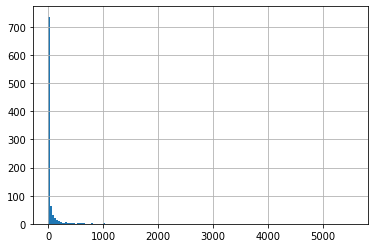

In [6]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins = 150)  # попробуйте поварировать bins=150

Хмм посмотрим на эти суммы подробнее

In [7]:
rounds = data.groupby('sum_gamerounds')['userid'].count()
df = pd.DataFrame([rounds]).T
df.tail(27)

,userid
sum_gamerounds,
1490,1
1491,1
1522,1
1528,1
1529,1
1544,1
1558,1
1559,1
1573,1


__ОПА Какой-то поехавший наиграл в 20 раз больше чем любой другой игрок, это очень странно__

In [8]:
data.sort_values('sum_gamerounds')

,userid,version,sum_gamerounds,retention_1,retention_7
45094,4995815,gate_40,0,False,False
56753,6289435,gate_30,0,False,False
56786,6293240,gate_40,0,False,False
56834,6299092,gate_30,0,False,False
56876,6304159,gate_40,0,False,False
...,...,...,...,...,...
48188,5346171,gate_40,2294,True,True
43671,4832608,gate_30,2438,True,True
29417,3271615,gate_40,2640,True,False
7912,871500,gate_30,2961,True,True


нашли этого психа, удалим выброс 

In [9]:
data.drop([57702], inplace=True)

In [10]:
data.sort_values('sum_gamerounds')

,userid,version,sum_gamerounds,retention_1,retention_7
46551,5159863,gate_40,0,False,False
79246,8773542,gate_30,0,False,False
50705,5620952,gate_40,0,False,False
59059,6538238,gate_40,0,False,False
4039,446820,gate_30,0,False,False
...,...,...,...,...,...
46344,5133952,gate_30,2251,True,True
48188,5346171,gate_40,2294,True,True
43671,4832608,gate_30,2438,True,True
29417,3271615,gate_40,2640,True,False


Text(0.5, 0, '№ Игрового раунда')

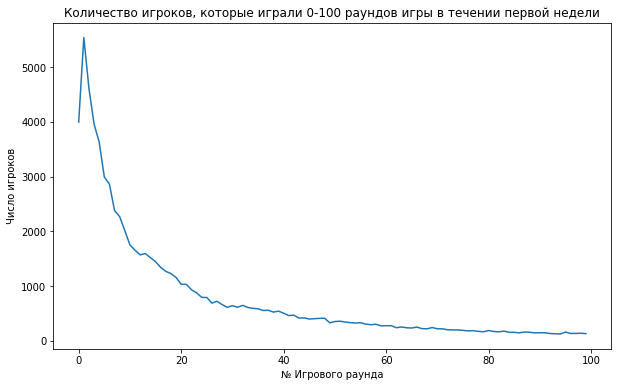

In [11]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов
# в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("Количество игроков, которые играли 0-100 раундов игры в течении первой недели")
ax.set_ylabel("Число игроков")
ax.set_xlabel('№ Игрового раунда')

ну тут все очевидно - быстрый пик и постепенное падение интереса, так с большей частью казуальных игр происходит

<AxesSubplot:ylabel='Density'>

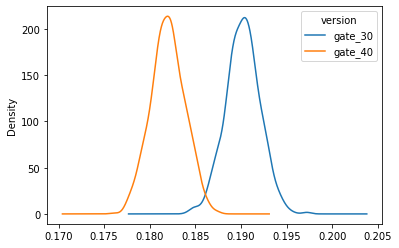

In [12]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Мы видим как из-за сдвига ворот распределение сместилось влево  

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [20]:
# сравним распределение количества игровых раундов у тех, кто остался на 7й день 
# до сдвига ворот и после сдвига ворот, нулевая гипотеза - оно не изменилось

gate_30 = data.loc[(data['version'] == 'gate_30') & (data['retention_7'] == True)]
gate_40 = data.loc[(data['version'] == 'gate_40') & (data['retention_7'] == True)]

In [23]:
print(np.var(gate_30['sum_gamerounds']))
print(np.var(gate_40['sum_gamerounds']))

32165.70869332193
33775.60235261268


In [29]:
shapiro_test_30 = st.shapiro(gate_30['sum_gamerounds'])
shapiro_test_40 = st.shapiro(gate_40['sum_gamerounds'])
print(shapiro_test_30.pvalue)
print(shapiro_test_40.pvalue)

0.0
0.0


C:\Users\Professional\AppData\Roaming\Python\Python38\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
from scipy.stats import mannwhitneyu
# Сравнение групп U-тестом Манна-Уитни

group_1 = gate_30['sum_gamerounds']
group_2 = gate_40['sum_gamerounds']

stat, p = mannwhitneyu(group_1, group_2) # 
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=34382697.000, p=0.005
Разные распределения (отвергаем H0)


Как мы и ожидали (и в согласии с графиком выше) - распределение сдвинулось